In [6]:
import numpy as np
from astropy.io import fits
from scipy.stats import gamma
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 25})
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
import sys
sys.path.append('../../../2YR-UNI/Blok2/AppStat2019/External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax  
import winsound
import pyregion

In [7]:
# Get COSMOS data
file_name = 'cosmos2015_D17_v2.0_zmin-zmax.fits' #davidzon17 paper

# Data for observed galaxies
hdul = fits.open(file_name)
ra = hdul[1].data["RA_J2000"] # Right ascension
dec = hdul[1].data["DEC_J2000"] # Declination
z = hdul[1].data["ZBEST"] # Redshift
mass = hdul[1].data["logMASS_MED"] # Mass
hdul.close()

[Text(0, 0.5, 'Declination'),
 Text(0.5, 0, 'Right ascencion'),
 Text(0.5, 1.0, 'COSMOS2015 Ultravista Field')]

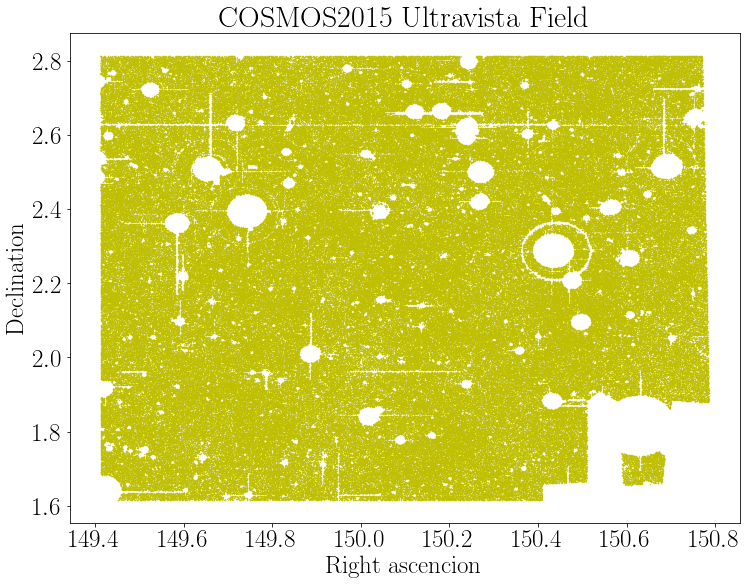

In [8]:
side1 = 4.8/60 #Is this right?
side2= 9.6/60
ra_min = np.min(ra)
dec_min = np.min(dec)
ra_max = np.max(ra)
dec_max = np.max(dec)

ra_vals = np.arange(ra_min, ra_max, side2)
dec_vals = np.flip(np.arange(dec_max, dec_min, -side1))
# Plot of grid of pointings
fig, ax=plt.subplots(figsize=(12,9))
ax.scatter(ra,dec,s=0.1,c='y')

# x, y = np.meshgrid(ra_vals, dec_vals)
# ax.scatter(x,y)
ax.set(xlabel='Right ascencion', ylabel='Declination', title='COSMOS2015 Ultravista Field')

In [16]:
#obs, loading a file takes forever
region_name = "reg/deep-strips.reg"
r = pyregion.open(region_name)
duration = 250  # milliseconds
freq = 500  # Hz
winsound.Beep(freq, duration)

In [21]:
r[0]

Shape : polygon ( Number(150.58092),Number(2.7152452),Number(150.42075),Number(2.7179624),Number(150.41536),Number(2.4259806),Number(150.42058),Number(1.8699921),Number(150.49929),Number(1.8793095),Number(150.48998),Number(1.9939733),Number(150.58603),Number(1.9872824) )

In [20]:
r = pyregion.open(region_name).as_imagecoord(header=hdul[1].header)

ValueError: WCS should contain celestial component

In [23]:
from astropy.wcs import WCS
wcs = WCS(hdul[0].header)

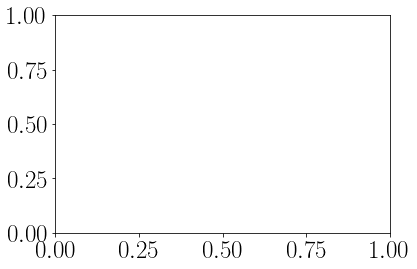

In [28]:
fig, ax=plt.subplots()
def fixed_color(shape, saved_attrs):
    attr_list, attr_dict = saved_attrs
    attr_dict["color"] = "red"
    kwargs = properties_func_default(shape, (attr_list, attr_dict))

    return kwargs


# select region shape with tag=="Group 1"
r1 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") == "Group 1"])
patch_list1, artist_list1 = r1.get_mpl_patches_texts(fixed_color)

r2 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") != "Group 1"])
patch_list2, artist_list2 = r2.get_mpl_patches_texts()

for p in patch_list1 + patch_list2:
    ax.add_patch(p)
for t in artist_list1 + artist_list2:
    ax.add_artist(t)

plt.show()